In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
X = pd.read_csv('../input/agro-data/X1.csv',header=0)
y = pd.read_csv('../input/agro-data/y1.csv',header=0)
y = y.iloc[:, 0]
datas = X

In [3]:
from sklearn import preprocessing
x = X.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
X.columns = datas.columns[0:27]

In [4]:
del X['avg_rain']
# del X['ANNUAL']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Comparison with different regression models

## Gradient Boosting with Hyperparameters Tuning

### Below code is for hyperparameter tuning

In [6]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
# X, y = make_regression(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# best = 1000
# lr=0
# params = [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.13, 0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.26, 0.29, 0.3]
# for i in params:
#     reg = GradientBoostingRegressor(learning_rate=i,n_estimators = 25, max_depth=25, random_state=0)
#     reg.fit(X_train, y_train)
#     pred = reg.predict(X_test)
#     error = sqrt(mean_squared_error(pred,y_test))
#     print(error)
#     if(best>error):
#         best = error
#         lr = i

# num = 0
# best = 1000
# for i in range(10,1000,10):
#     reg = GradientBoostingRegressor(learning_rate = lr, n_estimators = i, max_depth=25, random_state=0)
#     reg.fit(X_train, y_train)
#     pred = reg.predict(X_test)
#     error = sqrt(mean_squared_error(pred,y_test))
#     print(error)
#     if(best>error):
#         best = error
#         num = i
# md = 0 
# best = 1000
# for i in range(5,91):
#     reg = GradientBoostingRegressor(learning_rate = lr, n_estimators = num, max_depth = i, random_state=0)
#     reg.fit(X_train, y_train)
#     pred = reg.predict(X_test)
#     error = sqrt(mean_squared_error(pred,y_test))
#     print(error)
#     if(best>error):
#         best = error
#         md = i 


### Gradient Boosting using best set of hyperparameters

In [7]:
reg = GradientBoostingRegressor(learning_rate=0.03,n_estimators = 30, max_depth=10, random_state=0)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
error = sqrt(mean_squared_error(pred,y_test))
print(error)
print("Testing error: ",error)

520.7190620379137
Testing error:  520.7190620379137


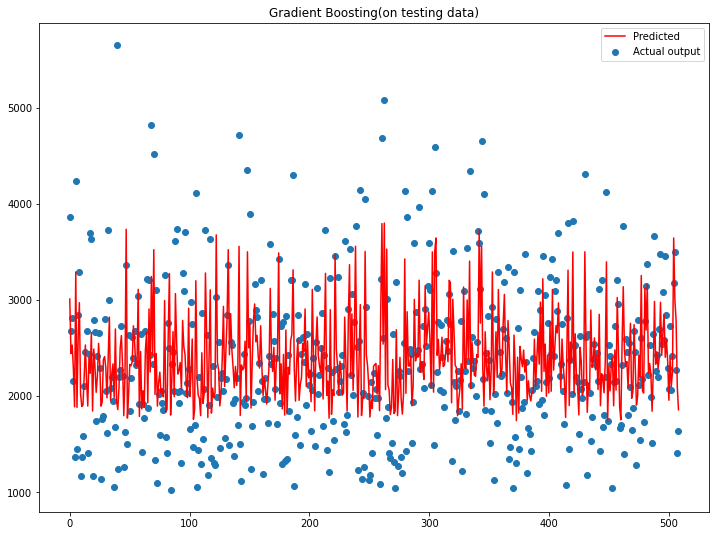

In [8]:
xl = np.linspace(0,508,508);
fig, (ax) = plt.subplots(1, 1 , figsize=(12,9))
ax.scatter(xl,y_test,label='Actual output')
ax.plot(xl,pred,color='red',label = 'Predicted')
plt.title('Gradient Boosting(on testing data)')
leg = ax.legend();

## Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression 
linear_reg = LinearRegression() 
linear_reg.fit(X_train,y_train)
pred_test_linear = linear_reg.predict(X_test)
error = sqrt(mean_squared_error(pred_test_linear,y_test))
print("Testing error: ",error)

Testing error:  581.3990624951123


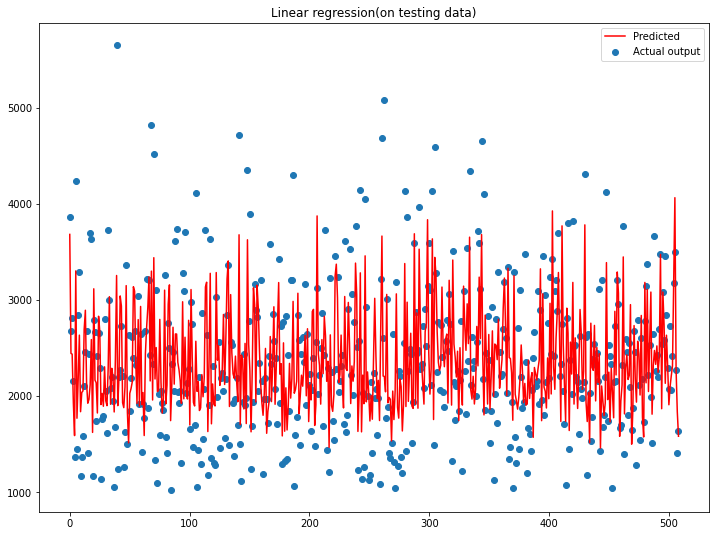

In [10]:
xl = np.linspace(0,508,508);
fig, (ax) = plt.subplots(1, 1 , figsize=(12,9))
ax.scatter(xl,y_test,label='Actual output')
ax.plot(xl,pred_test_linear,color='red',label = 'Predicted')
plt.title('Linear regression(on testing data)')
leg = ax.legend();

## Random Forest with hyperparameter tuning

### Below Code is for Hyperparameter tuning

In [11]:
# from sklearn.ensemble import RandomForestRegressor
# best = 1000
# j_depth = 1
# j_est = 0
# j_rand = 0
# for i in range(5,90) :
#     RF = RandomForestRegressor(n_estimators = 730, max_depth=i,random_state=4)
#     RF.fit(X_train, y_train)
#     pred_test_rf = RF.predict(X_test)
#     error_RF = sqrt(mean_squared_error(pred_test_rf,y_test))
#     if(error_RF < best):
#         best = error_RF
#         j_depth = i
#     print("Testing error: ",error_RF)
# #     pred_train_rf = RF.predict(X_train)
# #     train_error_rf = sqrt(mean_squared_error(pred_train_rf,y_train))
# #     print("Training error: ", train_error_rf)   

# print(best)    

# for j in range(10,1000,10) :
#     RF = RandomForestRegressor(n_estimators = j, max_depth=j_depth,random_state=4)
#     RF.fit(X_train, y_train)
#     pred_test_rf = RF.predict(X_test)
#     error_RF = sqrt(mean_squared_error(pred_test_rf,y_test))
#     if(error_RF < best):
#         best = error_RF
#         j_est = j
#     print("Testing error: ",error_RF)
# #     pred_train_rf = RF.predict(X_train)
# #     train_error_rf = sqrt(mean_squared_error(pred_train_rf,y_train))
# #     print("Training error: ", train_error_rf)    

# print(best)
    
# for k in range(0,10) :
#     RF = RandomForestRegressor(n_estimators = j_est, max_depth=j_depth,random_state=k)
#     RF.fit(X_train, y_train)
#     pred_test_rf = RF.predict(X_test)
#     error_RF = sqrt(mean_squared_error(pred_test_rf,y_test))
#     if(error_RF < best):
#         best = error_RF
#         j_rand = k
#     print("Testing error: ",error_RF)
# #     pred_train_rf = RF.predict(X_train)
# #     train_error_rf = sqrt(mean_squared_error(pred_train_rf,y_train))
# #     print("Training error: ", train_error_rf)        

# print(best)    


## Random Forest using best set of Hyperparmeters

In [12]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 970, max_depth=27,random_state=9)
RF.fit(X_train, y_train)
pred_test_rf = RF.predict(X_test)
error_RF = sqrt(mean_squared_error(pred_test_rf,y_test))
print("Testing error: ",error_RF)

Testing error:  415.06975729921913


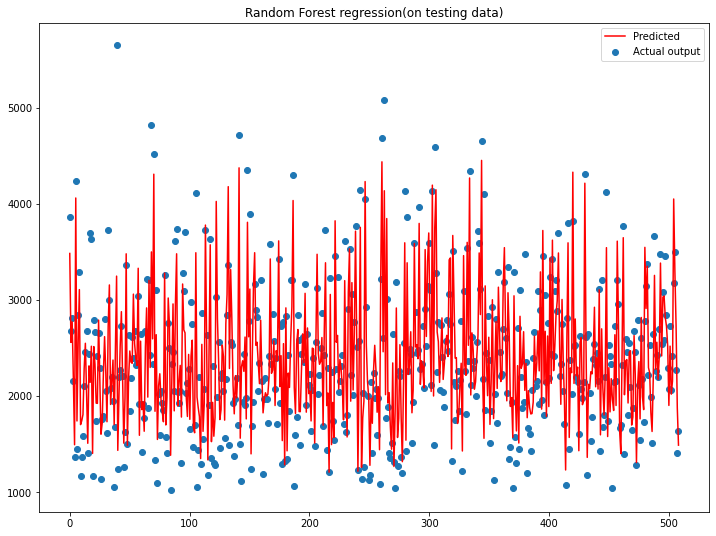

In [13]:
xl = np.linspace(0,508,508);
fig, (ax) = plt.subplots(1, 1 , figsize=(12,9))
ax.scatter(xl,y_test,label='Actual output')
ax.plot(xl,pred_test_rf,color='red',label = 'Predicted')
plt.title('Random Forest regression(on testing data)')
leg = ax.legend();